In [1]:
!git clone https://github.com/Bduz/intro_pytorch.git

Cloning into 'intro_pytorch'...
remote: Enumerating objects: 37, done.
remote: Counting objects: 100% (37/37), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 37 (delta 15), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (37/37), done.


# 0 - Load all the Necessary Modules

In [2]:
import sys
sys.path.insert(0, '/content/intro_pytorch/')

In [3]:
import numpy as np
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F

import helperfuncs

# 1 - Load and Process the Data

Load the MNIST data and transform it.

In [6]:
from torchvision import datasets, transforms

# Define transformations on the data
transform  = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5), (0.5)),])

#Load the training data
trainset = datasets.MNIST('MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

#Load the test data
testset = datasets.MNIST('MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



# 2 - The Model of the Neural Network

In [7]:
class MnistModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.fully_connect1 = nn.Linear(784, 256)
    self.fully_connect2 = nn.Linear(256, 512)
    self.fully_connect3 = nn.Linear(512, 10)

  def forward(self, x):
    x = self.fully_connect1(x)
    x = F.relu(x)
    x = self.fully_connect2(x)
    x = F.relu(x)
    x = self.fully_connect3(x)

    return x


model = MnistModel()
model


MnistModel(
  (fully_connect1): Linear(in_features=784, out_features=256, bias=True)
  (fully_connect2): Linear(in_features=256, out_features=512, bias=True)
  (fully_connect3): Linear(in_features=512, out_features=10, bias=True)
)

In [10]:
print(model.fully_connect2.bias.shape)

torch.Size([512])


# 3 - Train the Model

In [11]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

epochs = 3
print_every = 40
steps = 0
for e in range(epochs):
  running_loss = 0
  for images, labels in iter(trainloader):
    steps += 1
    images.resize_(images.size()[0], 784)   # Resize 28x28 image into 1x784 vector

    optimizer.zero_grad()

    output = model.forward(images)
    loss = criterion(output, labels)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()

    if steps % print_every == 0:
      print(f'Epoch: {e+1}/{epochs}, Loss: {running_loss/print_every:.4f}')
      running_loss = 0






Epoch: 1/3, Loss: 2.2683
Epoch: 1/3, Loss: 2.1765
Epoch: 1/3, Loss: 2.0482
Epoch: 1/3, Loss: 1.8367
Epoch: 1/3, Loss: 1.5685
Epoch: 1/3, Loss: 1.2891
Epoch: 1/3, Loss: 1.0915
Epoch: 1/3, Loss: 0.9107
Epoch: 1/3, Loss: 0.8020
Epoch: 1/3, Loss: 0.7500
Epoch: 1/3, Loss: 0.6700
Epoch: 1/3, Loss: 0.6429
Epoch: 1/3, Loss: 0.5663
Epoch: 1/3, Loss: 0.5420
Epoch: 1/3, Loss: 0.5216
Epoch: 1/3, Loss: 0.4877
Epoch: 1/3, Loss: 0.4971
Epoch: 1/3, Loss: 0.4863
Epoch: 1/3, Loss: 0.4429
Epoch: 1/3, Loss: 0.4459
Epoch: 1/3, Loss: 0.4218
Epoch: 1/3, Loss: 0.4289
Epoch: 1/3, Loss: 0.4111
Epoch: 2/3, Loss: 0.2098
Epoch: 2/3, Loss: 0.3921
Epoch: 2/3, Loss: 0.3754
Epoch: 2/3, Loss: 0.4421
Epoch: 2/3, Loss: 0.3763
Epoch: 2/3, Loss: 0.3641
Epoch: 2/3, Loss: 0.3574
Epoch: 2/3, Loss: 0.3915
Epoch: 2/3, Loss: 0.3662
Epoch: 2/3, Loss: 0.3655
Epoch: 2/3, Loss: 0.3708
Epoch: 2/3, Loss: 0.3754
Epoch: 2/3, Loss: 0.3569
Epoch: 2/3, Loss: 0.3599
Epoch: 2/3, Loss: 0.3499
Epoch: 2/3, Loss: 0.3283
Epoch: 2/3, Loss: 0.3222


# 4 - Analyze the Results

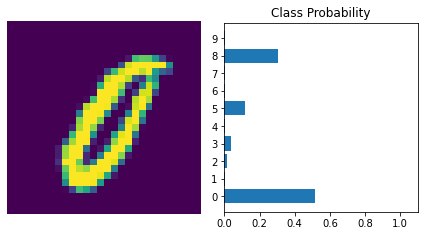

In [13]:
images, labels = next(iter(testloader))
img = images[32].view(1, 784)

with torch.no_grad():
  logits = model.forward(img)

ps = F.softmax(logits, dim=1)
helperfuncs.view_classify(img.view(1, 28, 28), ps)